In [1]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Medical_insurance_cost.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
ord_encoder = OrdinalEncoder(categories=[['male','female']])

df1 = ord_encoder.fit_transform(df[['sex']])

df1

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [8]:
ord_encoder = OrdinalEncoder(categories=[['yes','no']])

df2 = ord_encoder.fit_transform(df[['smoker']])

df2

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [9]:
df['sex'] = df1
df['smoker'] = df2

df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,southwest,16884.92400
1,18,0.0,33.770,1,1.0,southeast,1725.55230
2,28,0.0,33.000,3,1.0,southeast,4449.46200
3,33,0.0,22.705,0,1.0,northwest,21984.47061
4,32,0.0,28.880,0,1.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,1.0,northwest,10600.54830
1334,18,1.0,31.920,0,1.0,northeast,2205.98080
1335,18,1.0,36.850,0,1.0,southeast,1629.83350
1336,21,1.0,25.800,0,1.0,southwest,2007.94500


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

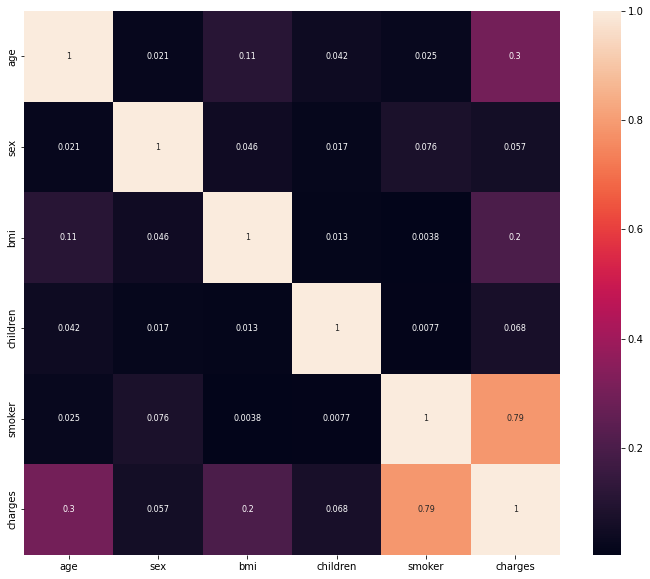

In [11]:
df_corr = df.corr().abs()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':8})

plt.show()

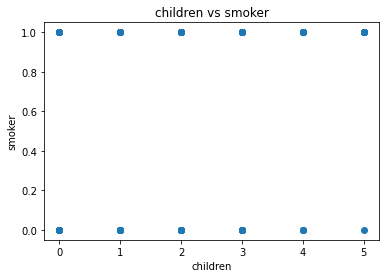

In [12]:
plt.scatter(df.children,df.smoker)
plt.xlabel('children')
plt.ylabel('smoker')

plt.title('children vs smoker')
plt.show()

In [13]:
x = df.drop(columns=['charges','region'])

y = df['charges']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
from sklearn import metrics

In [17]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
ada = AdaBoostRegressor()

In [19]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [20]:
x_train_pred = ada.predict(x_train)

In [21]:
accuracy = metrics.r2_score(y_train,x_train_pred)

accuracy

0.8519978040134287

In [22]:
x_test_pred = ada.predict(x_test)

In [23]:
accuracy = metrics.r2_score(y_test,x_test_pred)

accuracy

0.8403206490611603

In [24]:
# hyperparameter tuning using RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [27]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [28]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [29]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4)

In [30]:
ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=47)

ada.fit(x_train,y_train)

x_test_pred = ada.predict(x_test)

print('***accuracy post tuning***')
print(metrics.r2_score(y_test,x_test_pred))

***accuracy post tuning***
0.8103594112625006
